<a href="https://colab.research.google.com/github/roshank1605A04/Big-Mart-Sales-Prediction/blob/master/BigMartSales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

**Importing the datasets**

In [41]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# making copies of train and test dataset
train = train.copy()
test = test.copy()

train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [43]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [44]:
# Checking the shape of the training and testing datasets

print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [45]:
# combining the train and test dataset

data = pd.concat([train, test])

print(data.shape)

(14204, 12)


**Data Visualization**

*univariate data analysis*

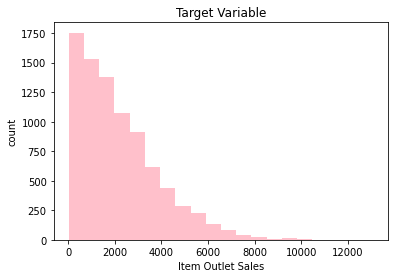

In [46]:
plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

In [47]:
# checking the columns of the train set

print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [48]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [49]:
# checking the different items in Item Idemtifier

train['Item_Identifier'].value_counts()


FDG33    10
FDW13    10
FDV38     9
FDG09     9
FDX31     9
         ..
FDK57     1
FDY43     1
FDQ60     1
FDO33     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

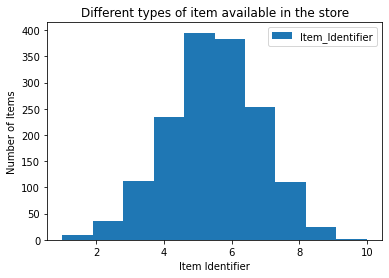

In [50]:
# we will analyze only the training set

train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [51]:
# checking the different items in Item Fat Content

train['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

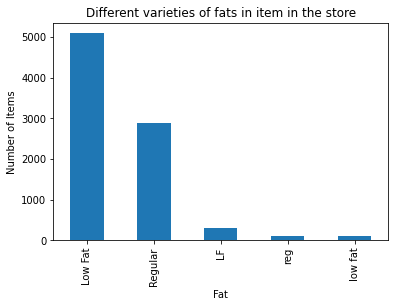

In [52]:
# checking different varieties of item fat content

train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [53]:
# checking the different items in Item Type

train['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

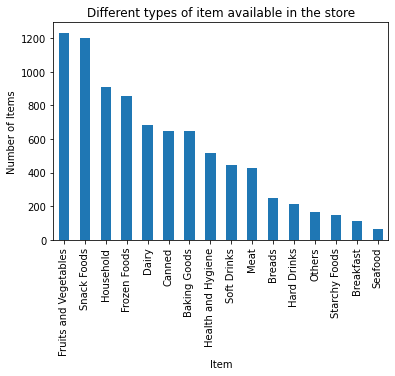

In [54]:
# we will analyze only the training set

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [55]:
# checking the different types of Outlet Identifier

train['Outlet_Identifier'].value_counts()


OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

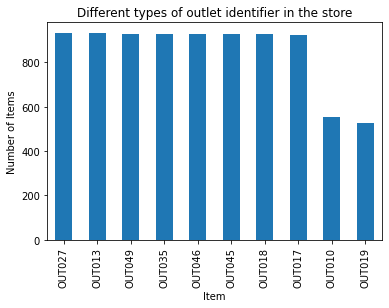

In [56]:
# we will analyze only the training set

train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [57]:
# checking the different types of Outlet Size

train['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

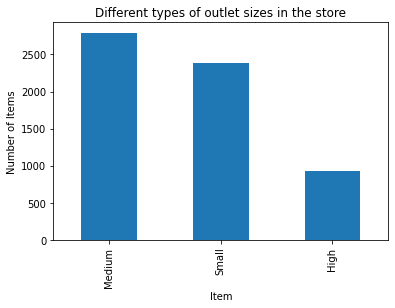

In [58]:
# we will analyze only the training set

train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [59]:
# checking different types of items in Outlet Location Type

train['Outlet_Location_Type'].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

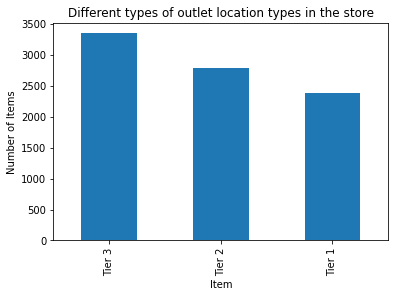

In [60]:
# we will analyze only the training set

train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [61]:
# checking different types of item in Outlet Type

train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

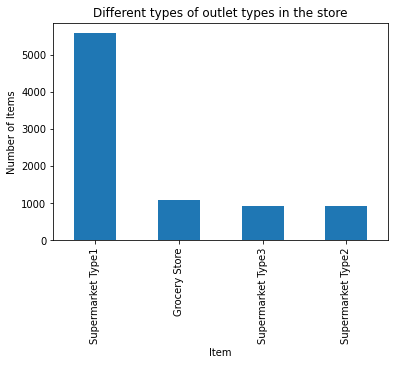

In [62]:
# we will analyze only the training set

train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content'>

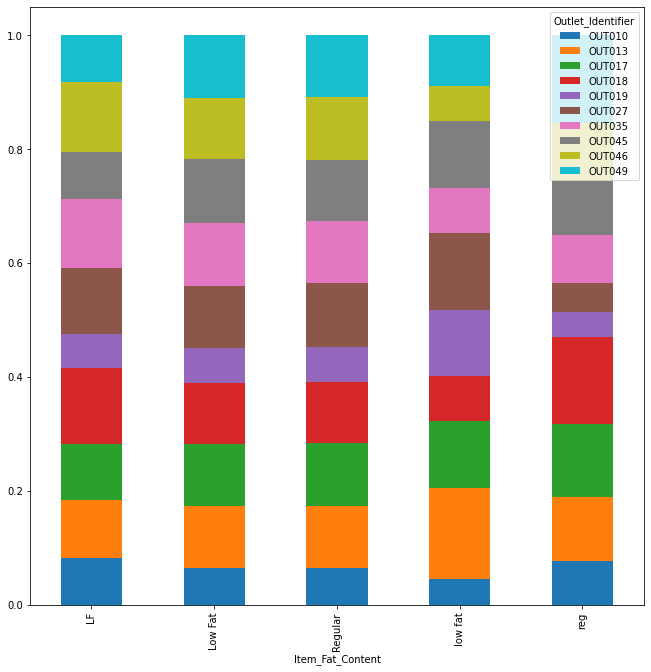

In [63]:
# fat content vs outlet identifier

Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

<AxesSubplot:xlabel='Item_Type'>

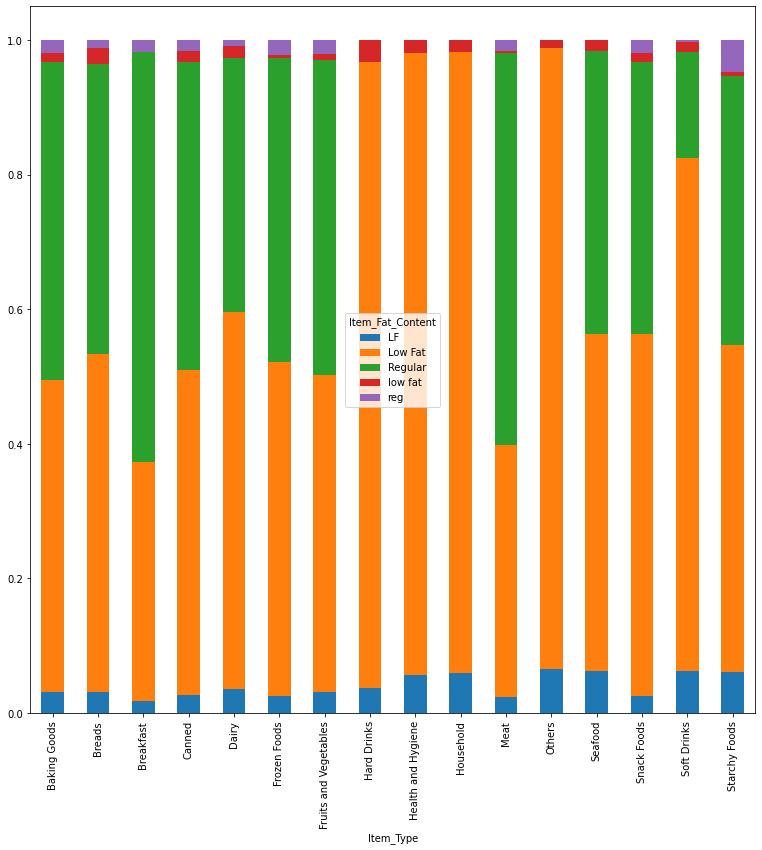

In [64]:
# fat content vs item type

Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))


**data pre processing**

In [65]:
# checking unique values in the columns of train dataset

data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [66]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [67]:
# imputing missing values

data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [68]:
# combining reg, Regular and Low Fat, low fat and, LF


data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [69]:
# Getting the first two characters of ID to separate them into different categories

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [70]:
# determining the operation peroid of a time

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

In [71]:
# removing unnecassary columns from the dataset

#data = data.drop('Item_Identifier', axis = 1)

#print(data.shape)

In [72]:
data['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [73]:
# label encoding

from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,1,284,0,1097,4,7567,9,4,1,0,1,2540,4
1,0,57,1,1436,14,632,3,8,1,2,2,422,0
2,1,376,0,1172,10,3897,9,4,1,0,1,1639,4
3,1,393,1,0,6,5626,0,3,1,2,0,670,5
4,2,265,0,0,9,848,1,1,0,2,1,865,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,298,1,718,13,3881,8,2,2,0,1,835,6
5677,1,180,1,11820,15,5069,3,8,1,2,2,835,0
5678,2,293,0,8009,8,3196,7,5,1,1,1,835,3
5679,1,354,1,0,3,6626,2,7,1,1,1,835,1


In [74]:
# one hot encoding

data = pd.get_dummies(data)

print(data.shape)

(14204, 47)


In [75]:
# splitting the data into dependent and independent variables

x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 46)
(14204,)


In [76]:
# splitting the dataset into train and test

train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 47)
(5681, 47)


In [77]:
# making x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9942, 46)
(9942,)
(4262, 46)
(4262,)


**Modelling**

**Linear Regression**

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))


[1728. 2236. 1908. ... 2116. 2956. 1628.]
RMSE : 1238.3546593702788
Variance score: 0.28


**AdaBoost Regressor**

In [79]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))


RMSE : 1382.1661453144804


**XgBoost Regressor**

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[ 790.97796198 2182.06687604 1867.94242791 ... 2083.73239586 3405.91359644
 1657.56088506]
RMSE : 1227.5383840934367


**Random Forest Regression**

In [81]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))


[ 668.110326 2128.709076 1564.257152 ... 2514.713284 2033.48636
 2069.832382]
RMSE : 1311.098343445404
Variance score: 0.19
Result : 0.8899873148343594


**Decision Tree Regressor**

In [82]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[ 717.0666  387.4956 2577.9776 ... 1277.0044  958.752   958.752 ]
 RMSE :  1768.5697282120695


**Support vector machine**

In [83]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

# predicting the x test results
y_pred = model.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))


RMSE : 1638.6104743356386
